In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from chainladder import Chainladder
import seaborn as sns
from scipy.stats import variation
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [126]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Base de Données MATHURANCE.csv')
df.head()

,Exercice,Branche,Code Produit,Désignation Produit,Sous-Branche,Date Survenance,Règlement
0,2021,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/10/2019,"3,058,431,658.25"
1,2018,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/03/2017,"2,972,782,699.76"
2,2019,Risques Industriels,IN,Incendie Risques Annexes,Incendie,17/06/2017,"2,611,498,652.63"
3,2016,Risques Industriels,IN,Incendie Risques Annexes,Incendie,27/01/2015,"2,547,475,510.49"
4,2022,Risques Industriels,IN,Incendie Risques Annexes,Incendie,04/01/2021,"2,057,631,891.60"


In [127]:
print(df.isnull().sum())

Exercice               0
Branche                0
Code Produit           0
Désignation Produit    0
Sous-Branche           0
Date Survenance        0
Règlement              0
dtype: int64


In [128]:
df.columns

Index(['Exercice', 'Branche', 'Code Produit', 'Désignation Produit',
       'Sous-Branche', 'Date Survenance', 'Règlement'],
      dtype='object')

In [129]:

# Clean and convert 'Règlement' column to float
df["Règlement"] = df["Règlement"].str.strip()  # Remove leading/trailing spaces
df["Règlement"] = df["Règlement"].str.replace(",", "", regex=True)  # Remove commas
df["Règlement"] = df["Règlement"].astype(float)  # Convert to float

df.head()


,Exercice,Branche,Code Produit,Désignation Produit,Sous-Branche,Date Survenance,Règlement
0,2021,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/10/2019,3.058432e+09
1,2018,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/03/2017,2.972783e+09
2,2019,Risques Industriels,IN,Incendie Risques Annexes,Incendie,17/06/2017,2.611499e+09
3,2016,Risques Industriels,IN,Incendie Risques Annexes,Incendie,27/01/2015,2.547476e+09
4,2022,Risques Industriels,IN,Incendie Risques Annexes,Incendie,04/01/2021,2.057632e+09


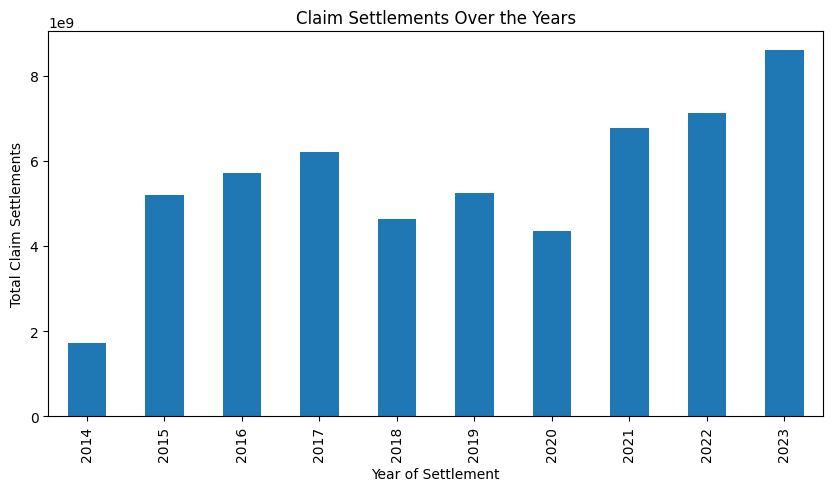

In [130]:
import matplotlib.pyplot as plt

df.groupby("Exercice")["Règlement"].sum().plot(kind="bar", figsize=(10,5))
plt.xlabel("Year of Settlement")
plt.ylabel("Total Claim Settlements")
plt.title("Claim Settlements Over the Years")
plt.show()


<Axes: xlabel='Désignation Produit'>

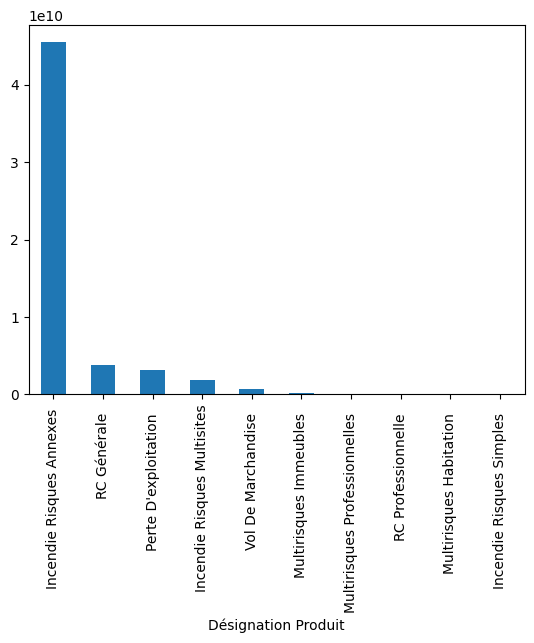

In [131]:
# Identify which insurance products contribute most to settlements
cnt= df.groupby("Désignation Produit")["Règlement"].sum().sort_values(ascending=False)
cnt.head(10).plot(kind="bar")

C:\Users\Anfal\AppData\Local\Temp\ipykernel_8184\421508337.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date Survenance"] = pd.to_datetime(df["Date Survenance"])


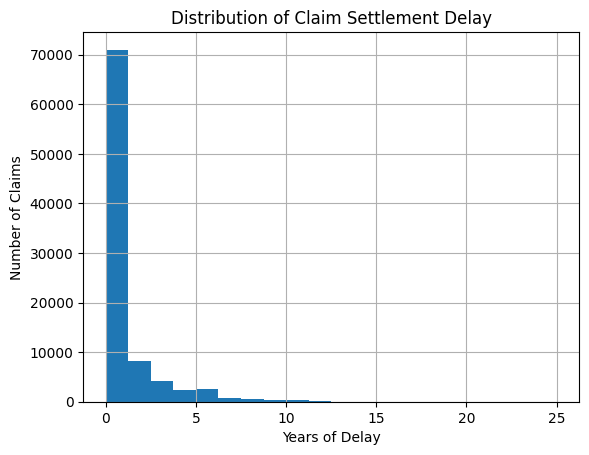

In [132]:
df["Date Survenance"] = pd.to_datetime(df["Date Survenance"])
df["Settlement Delay"] = df["Exercice"] - df["Date Survenance"].dt.year

df["Settlement Delay"].hist(bins=20)
plt.xlabel("Years of Delay")
plt.ylabel("Number of Claims")
plt.title("Distribution of Claim Settlement Delay")
plt.show()


In [133]:
df.head()

,Exercice,Branche,Code Produit,Désignation Produit,Sous-Branche,Date Survenance,Règlement,Settlement Delay
0,2021,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2019-10-14,3.058432e+09,2
1,2018,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2017-03-14,2.972783e+09,1
2,2019,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2017-06-17,2.611499e+09,2
3,2016,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2015-01-27,2.547476e+09,1
4,2022,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2021-01-04,2.057632e+09,1


In [134]:
# Convert 'Date Survenance' to datetime format
df["Date Survenance"] = pd.to_datetime(df["Date Survenance"], dayfirst=True)

# Extract the year and store it in a new column 'Year Survenance'
df["Year Survenance"] = df["Date Survenance"].dt.year

# Display the first rows to verify
df.head()

,Exercice,Branche,Code Produit,Désignation Produit,Sous-Branche,Date Survenance,Règlement,Settlement Delay,Year Survenance
0,2021,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2019-10-14,3.058432e+09,2,2019
1,2018,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2017-03-14,2.972783e+09,1,2017
2,2019,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2017-06-17,2.611499e+09,2,2017
3,2016,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2015-01-27,2.547476e+09,1,2015
4,2022,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2021-01-04,2.057632e+09,1,2021


In [135]:

# Count occurrences for each year
year_counts = df["Year Survenance"].value_counts().sort_index()

# Display the counts
print(year_counts)


Year Survenance
1998        4
1999        1
2001        1
2002        9
2003       25
2004       74
2005       42
2006       77
2007      122
2008      135
2009      337
2010      523
2011     1363
2012     2470
2013     5353
2014     7919
2015     8773
2016     8033
2017     8850
2018    10751
2019     9011
2020     6352
2021     7996
2022     7580
2023     4428
Name: count, dtype: int64


In [136]:
# Group by 'Year Survenance' and 'Exercice', then count occurrences
grouped_counts = df.groupby(["Year Survenance", "Exercice"]).size().reset_index(name="Count")

# Display the result
print(grouped_counts)

# Optional: Save the output to a CSV file
grouped_counts.to_csv("year_survenance_exercice_counts.csv", index=False)

     Year Survenance  Exercice  Count
0               1998      2017      2
1               1998      2019      1
2               1998      2023      1
3               1999      2017      1
4               2001      2015      1
..               ...       ...    ...
167             2021      2022   3138
168             2021      2023    655
169             2022      2022   4457
170             2022      2023   3123
171             2023      2023   4428

[172 rows x 3 columns]


In [ ]:

# Compute Development Year (Settlement Delay)
df["Development Year"] = df["Exercice"] - df["Year Survenance"]

# Get the full range of years to ensure a square matrix
min_year = df["Year Survenance"].min()
max_year = df["Exercice"].max()
full_years = list(range(min_year, max_year + 1))  # Ensures a square shape

# Dictionary to store cumulative liquidity matrices for each Sous-Branche
cumulative_liquidity_matrices = {}

# Build Cumulative Liquidity Matrix for each 'Sous-Branche'
for sous_branche, group in df.groupby("Sous-Branche"):
    # Create a pivot table (Liquidity Matrix / Run-Off Triangle)
    triangle = group.pivot_table(index="Year Survenance", 
                                 columns="Development Year", 
                                 values="Règlement", 
                                 aggfunc="sum").fillna(0)
    
    # Ensure the matrix is square by reindexing
    triangle = triangle.reindex(index=full_years, columns=range(len(full_years)), fill_value=0)

    # Convert to Cumulative Liquidity Matrix (cumulative sum along rows)
    cumulative_triangle = triangle.cumsum(axis=1)

    # Store the cumulative result
    cumulative_liquidity_matrices[sous_branche] = cumulative_triangle

    # Display the Cumulative Liquidity Matrix for the current Sous-Branche
    print(f"\n🔹 Cumulative Liquidity Matrix for Sous-Branche: {sous_branche}")
    print(cumulative_triangle)

    # Save each Sous-Branche cumulative matrix to a separate CSV file
    cumulative_triangle.to_csv(f"Cumulative_Liquidity_Matrix_{sous_branche}.csv")



🔹 Cumulative Liquidity Matrix for Sous-Branche: CAT-NAT
Development Year         0          1          2          3           4   \
Year Survenance                                                            
1998                   0.00       0.00       0.00       0.00        0.00   
1999                   0.00       0.00       0.00       0.00        0.00   
2000                   0.00       0.00       0.00       0.00        0.00   
2001                   0.00       0.00       0.00       0.00        0.00   
2002                   0.00       0.00       0.00       0.00        0.00   
2003                   0.00       0.00       0.00       0.00        0.00   
2004                   0.00       0.00       0.00       0.00        0.00   
2005                   0.00       0.00       0.00       0.00        0.00   
2006                   0.00       0.00       0.00       0.00        0.00   
2007                   0.00       0.00       0.00       0.00        0.00   
2008                   0.00    

In [143]:
file_path = "Liquidity_Matrix_Risque simple.csv"  # Update with correct file path
df = pd.read_csv(file_path)

# Convert numerical columns to float (excluding 'Year Survenance')
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

# Step 1: Apply Row-wise Cumulative Sum with Stop Condition
for index, row in df.iterrows():
    row_values = row.iloc[1:].values  # Exclude 'Year Survenance' column
    cumulative_sum = 0
    found_non_zero = False  # Track if we've found a non-zero value

    for i in range(len(row_values)):
        if row_values[i] > 0:
            found_non_zero = True  # Start accumulating
            cumulative_sum += row_values[i]
        elif found_non_zero and row_values[i] == 0:  # Stop if a zero is followed by only zeros
            break
        row_values[i] = cumulative_sum if found_non_zero else row_values[i]

    df.iloc[index, 1:] = row_values  # Update the row with cumulative values

# Save the Corrected Cumulative Liquidity Matrix
output_file = "Cumulative_Liquidity_Matrix_Risque simple.csv"
df.to_csv(output_file, index=False)

print("Corrected Cumulative Liquidity Matrix saved successfully!")


Corrected Cumulative Liquidity Matrix saved successfully!


In [100]:
df.head()

,Exercice,Branche,Code Produit,Désignation Produit,Sous-Branche,Date Survenance,Règlement,Year Survenance,Development Year
0,2021,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2019-10-14,3.058432e+09,2019,2
1,2018,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2017-03-14,2.972783e+09,2017,1
2,2019,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2017-06-17,2.611499e+09,2017,2
3,2016,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2015-01-27,2.547476e+09,2015,1
4,2022,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2021-01-04,2.057632e+09,2021,1


In [59]:
# Convert all columns (except the first) to numeric
matrix_df.iloc[:, 1:] = matrix_df.iloc[:, 1:].astype(float)

# Replace leading zeros with a small estimated value (threshold-based truncation)
threshold = np.percentile(matrix_df.iloc[:, 1:].values.flatten(), 1)  # Estimate smallest truncation value
matrix_df.replace(0, threshold, inplace=True)

# Save the cleaned dataset
matrix_df.to_csv("Liquidity_Matrix_Responsabilité Civile.csv", index=False)


## Imputing Upper Triangular

In [147]:
# Load the Liquidity Matrix
file_path = "Cumulative_Liquidity_Matrix_Incendie.csv"  # Update file path
matrix_df = pd.read_csv(file_path)

# Convert numerical columns to float (excluding 'Year Survenance')
matrix_df.iloc[:, 1:] = matrix_df.iloc[:, 1:].astype(float)

# Get the number of rows and columns
num_rows, num_cols = matrix_df.shape

# Step 1: Process Each Column to Fill Remaining Upper Triangle
for diag in range(1, num_cols - 1):  # Start from column 1, ignore 'Year Survenance'
    for col in range(num_cols - 1, diag, -1):  # Move backward from rightmost column
        lambdas = []  # Store lambda values for averaging

        # Step 2: Compute Lambda for Non-Zero Values
        for row in range(num_rows):
            if matrix_df.iloc[row, col] > 0 and matrix_df.iloc[row, col - 1] > 0:
                lambda_value = matrix_df.iloc[row, col] / matrix_df.iloc[row, col - 1]
                lambdas.append(lambda_value)

        # Step 3: Compute the Rolling Average Lambda
        if len(lambdas) > 3:
            avg_lambda = np.mean(lambdas[-3:])  # Use last 3 lambdas for stability
        elif lambdas:
            avg_lambda = np.mean(lambdas)  # Use full average if few values exist
        else:
            avg_lambda = 1  # If no valid lambda, assume no change

        # Step 4: Fill Missing Values in the Upper Triangle
        for row in range(num_rows):
            if matrix_df.iloc[row, col - 1] == 0 and matrix_df.iloc[row, col] > 0:
                matrix_df.iloc[row, col - 1] = matrix_df.iloc[row, col] / avg_lambda  # Estimate missing value

# Step 5: Final Cleanup – Interpolate Remaining Zeros
for col in range(1, num_cols):
    non_zero_mask = matrix_df.iloc[:, col] > 0
    matrix_df.iloc[:, col] = matrix_df.iloc[:, col].replace(0, np.nan).interpolate()

# Save the Fully Filled Matrix
output_file = "Upper_Filled_Cumulative_Liquidity_Matrix_Incendie.csv"
matrix_df.to_csv(output_file, index=False)



## Using statistical Uproach to fill the lower triangle

In [79]:
# Load the Liquidity Matrix
file_path = "Upper_Filled_Liquidity_Matrix_Incendie.csv"  # Ensure upper triangle is filled
matrix_df = pd.read_csv(file_path)

# Convert numerical columns to float (excluding 'Year Survenance')
matrix_df.iloc[:, 1:] = matrix_df.iloc[:, 1:].astype(float)

# Step 1: Compute Development Factors
development_factors = []
for col in range(matrix_df.shape[1] - 2):  # Exclude last column
    current_col = matrix_df.iloc[:, col + 1]
    next_col = matrix_df.iloc[:, col + 2]

    # Only consider rows where both values are present
    valid_rows = (current_col > 0) & (next_col > 0)
    
    if valid_rows.sum() > 0:
        factor = (next_col[valid_rows] / current_col[valid_rows]).mean()
    else:
        factor = 1  # Default if no valid data

    development_factors.append(factor)

# Step 2: Apply Chain-Ladder to Fill Lower Triangle
forecasted_matrix = matrix_df.copy()
for col in range(len(development_factors)):
    next_col_index = forecasted_matrix.columns[col + 2]
    
    # Predict missing values using previous column * development factor
    forecasted_matrix[next_col_index] = forecasted_matrix[next_col_index].fillna(
        forecasted_matrix.iloc[:, col + 1] * development_factors[col]
    )

# Save the Forecasted Matrix
forecasted_matrix.to_csv("Final_Predicted_Liquidity_Matrix_Incendie.csv", index=False)


## Time Series Aproach

In [86]:
# Load the Liquidity Matrix
file_path = "Upper_Filled_Liquidity_Matrix_Risque simple.csv"  # Update the correct path
matrix_df = pd.read_csv(file_path)

# Convert matrix to long format (melt)
time_series_df = matrix_df.melt(id_vars=["Year Survenance"], 
                                var_name="Development Year", 
                                value_name="Claim Amount")

# Convert columns to correct types
time_series_df["Development Year"] = time_series_df["Development Year"].astype(int)
time_series_df = time_series_df.sort_values(["Year Survenance", "Development Year"])

# Save the transformed dataset
time_series_df.to_csv("Risque simple_Time_Series.csv", index=False)
time_series_df.head()


,Year Survenance,Development Year,Claim Amount
0,1998,0,13.315565
21,1998,1,23.743179
42,1998,2,17.779229
63,1998,3,20.658461
84,1998,4,24.881822


C:\Users\Anfal\AppData\Local\Temp\ipykernel_8184\3169709294.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time Index"] = df["Year Survenance"] + df["Development Year"]


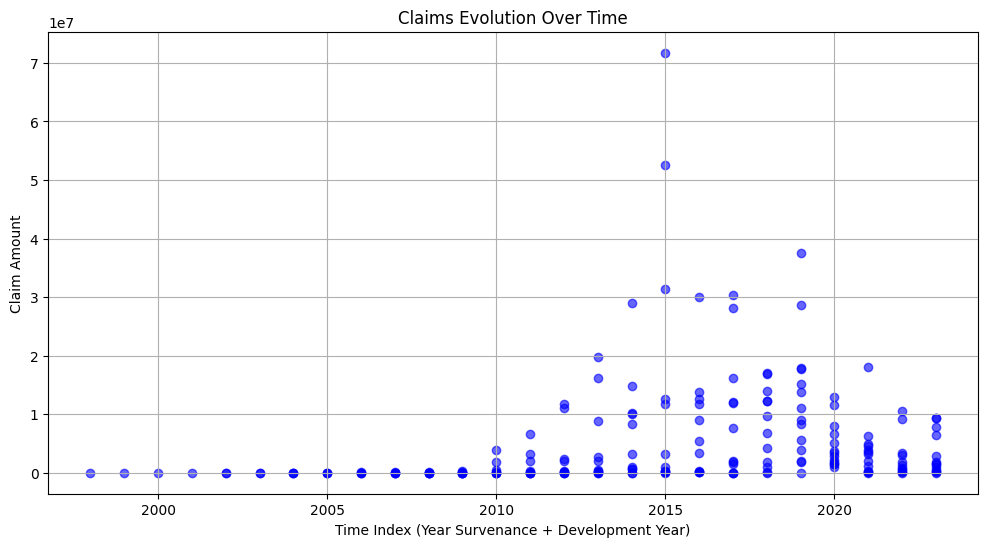

In [84]:

df = time_series_df

# Remove rows where Claim Amount is 0
df = df[df["Claim Amount"] > 0]

# Create a unique time index (Year Survenance + Development Year)
df["Time Index"] = df["Year Survenance"] + df["Development Year"]

# Sort data for better visualization
df = df.sort_values("Time Index")

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df["Time Index"], df["Claim Amount"], color='blue', alpha=0.6)

# Labels & title
plt.xlabel("Time Index (Year Survenance + Development Year)")
plt.ylabel("Claim Amount")
plt.title("Claims Evolution Over Time")
plt.grid(True)

# Show plot
plt.show()

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at

📊 Model Evaluation Metrics:
🔹 Mean Absolute Error (MAE): 90.57
🔹 Mean Squared Error (MSE): 8204.95
🔹 Root Mean Squared Error (RMSE): 90.58
🔹 Mean Absolute Percentage Error (MAPE): nan%


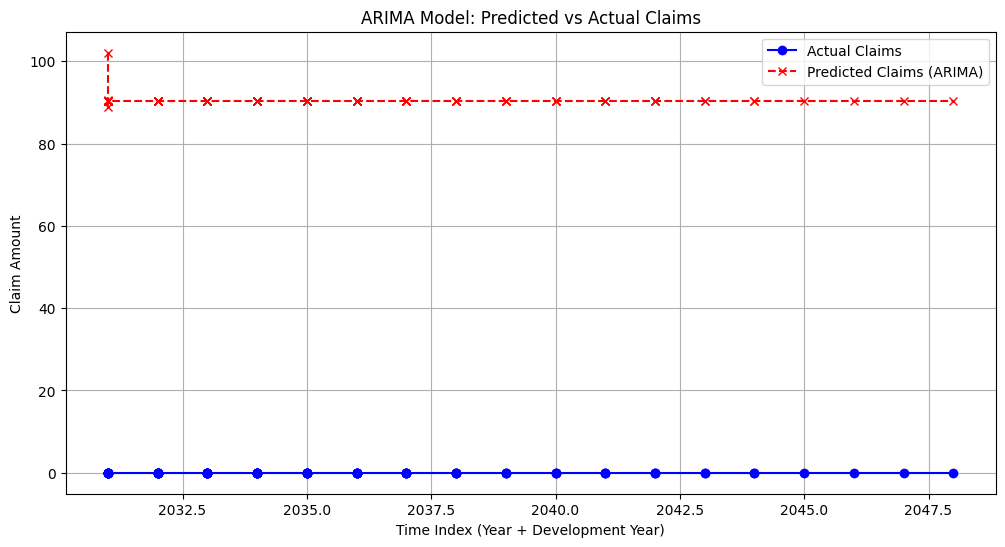

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


df = time_series_df

# Convert columns to correct types
df["Year Survenance"] = df["Year Survenance"].astype(int)
df["Development Year"] = df["Development Year"].astype(int)
df["Claim Amount"] = df["Claim Amount"].astype(float)

# Create a time index by summing Year + Development Year
df["Time_Index"] = df["Year Survenance"] + df["Development Year"]
df.set_index("Time_Index", inplace=True)
df = df.sort_index()  # Ensure chronological order

# 🔹 Step 2: Train-Test Split (80% Train, 20% Test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# 🔹 Step 3: Train ARIMA Model (order optimized as (1,1,1))
model = ARIMA(train["Claim Amount"], order=(1,1,1))
fitted_model = model.fit()

# Predict on test data
predictions = fitted_model.forecast(steps=len(test))

# 🔹 Step 4: Calculate Model Accuracy
mae = mean_absolute_error(test["Claim Amount"], predictions)
mse = mean_squared_error(test["Claim Amount"], predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test["Claim Amount"] - predictions) / test["Claim Amount"])) * 100

# Print Accuracy Metrics
print(" Model Evaluation Metrics:")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# 🔹 Step 5: Plot Actual vs Predicted Claims
plt.figure(figsize=(12,6))
plt.plot(test.index, test["Claim Amount"], label="Actual Claims", color="blue", marker="o")
plt.plot(test.index, predictions, label="Predicted Claims (ARIMA)", color="red", linestyle="dashed", marker="x")
plt.xlabel("Time Index (Year + Development Year)")
plt.ylabel("Claim Amount")
plt.title("ARIMA Model: Predicted vs Actual Claims")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Anfal\AppData\Local\Temp\ipykernel_8184\1279884171.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  matrix_df.fillna(method='bfill', axis=1, inplace=True)
C:\Users\Anfal\AppData\Local\Temp\ipykernel_8184\1279884171.py:46: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  matrix_df.fillna(method='ffill', axis=1, inplace=True)
